# MACHINELEARNING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import numpy as np
import pingouin as pg

In [2]:
def multiline(dataframe, exemptions):
    for col in dataframe.columns:
        if not col == exemptions:
            ax = plt.plot(dataframe.index, dataframe[col], label=col)
            listOf_Xticks = np.arange(0, len(dataframe), 24 )
            plt.xticks(listOf_Xticks)
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [3]:
df = pd.read_csv("/Users/natemcdowell/Desktop/python_for_the_datajam/datasets/for_ml.csv")

## Terms to Know
- **R-squared**: the r2(2=squared) value represents how much of the variance in the data can be explained by the model. The higher the value, the better the model fits. 
- **Adjusted R-squared**: The adjusted r2 value is used to correct some of the problems with raw r2 score. Adjusted r2 accounts for the number of variables with a dataset, only increasing the r2 score if the variable aids in prediction to a degree greater than what would occur simply by chance. The adjusted r2 value can be used as a more accurate way to determine the fit of a model. 
    - **Best**: above 0.75
    - **Decent**: above 0.4
- **RMSE**: RMSE stands for root-mean-square deviation. In statistical terms, RMSE is the standard deviation of the residuals, residuals meausring the distance between data points and teh regression line. RMSE tells you how spread the data points are around the regression line; how well the data fits to the model. Lower values for RMSE mean a better fit because ethe data is *less* far from the model.
    - **Best**: below 0.2
    - **Decent**: below 0.5

## Contents
1. [DUMMY_VARIABLES](#1.-DUMMY_VARIABLES)

2. [LINEAR_REGRESSION](#2.-LINEAR_REGRESSION)
    
    2.1 [COVID](#2.1-COVID)
    
    2.2 [H1N1](#3.-H1N1)

    2.3 [Both](#4.-Both)

3. [DISCUSSION](#2.-DISCUSSION)

In [4]:
print(df.shape)
df.head()

(252, 9)


,date,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths
0,2000-01-31,0.665408,0.353813,0.631568,0.0,0.0,0.923307,0.0,0.0
1,2000-02-29,0.584110,0.412626,0.590162,0.0,0.0,0.832206,0.0,0.0
2,2000-03-31,0.578318,0.500226,0.609973,0.0,0.0,0.896287,0.0,0.0
3,2000-04-30,0.552910,0.445279,0.627176,0.0,0.0,0.882311,0.0,0.0
4,2000-05-31,0.563840,0.534864,0.646570,0.0,0.0,0.930976,0.0,0.0


## 1. CORRELATION
Correlation is a meaurment between -1 and 1 that shows the strength of a linear relationship between two variables. Since we have many factors in our dataframe, we will be looking at the many correlations. The correlation below shows the many relationships within our dataframe. 

In [5]:
df.corr().round(3)

,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths
alcohol_deaths,1.000,0.651,0.945,0.644,0.192,0.740,-0.061,0.576
alcohol_sales,0.651,1.000,0.658,0.269,-0.163,0.603,-0.097,0.204
drug_deaths,0.945,0.658,1.000,0.715,0.252,0.799,-0.057,0.461
homicides,0.644,0.269,0.715,1.000,0.444,0.676,0.065,0.261
perc_unemp,0.192,-0.163,0.252,0.444,1.000,0.209,0.282,0.190
suicide_deaths,0.740,0.603,0.799,0.676,0.209,1.000,-0.073,0.147
h1n1_deaths,-0.061,-0.097,-0.057,0.065,0.282,-0.073,1.000,-0.031
covid_deaths,0.576,0.204,0.461,0.261,0.190,0.147,-0.031,1.000


<ipython-input-6-099a3e0d5eaa>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))


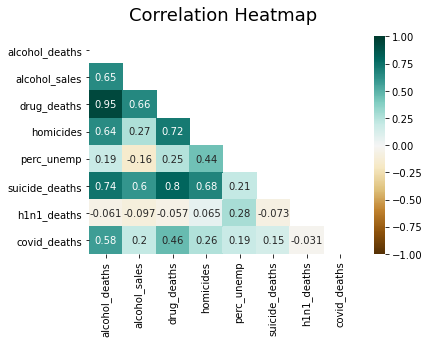

In [6]:
def corr_heatmap(dataframe):
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=np.bool))
    heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
corr_heatmap(df)

The table has a diagnol line of 1.000 running through it. This is because the each factor is featured on both the x axis and y axis, 1 is a result of a measuring correlation between two like items. Positive numbers are interpretted as positive correlations. The stronger the positive correlation the more likely the factors will "move" together(when one goes up the other one does too). Negative numbers are interepretted as negative correlations. The closer to -1 the stronger the NEGATIVE relationship the more like factors will "move" apart,  one factor will increase and the other will decrease. 

In [7]:
df.corr().unstack().sort_values().drop_duplicates().tail()
# this command will output the strongest positive correlations

homicides       drug_deaths       0.715119
alcohol_deaths  suicide_deaths    0.739877
suicide_deaths  drug_deaths       0.799104
alcohol_deaths  drug_deaths       0.945271
                alcohol_deaths    1.000000
dtype: float64

We can see that alcohol_deaths and drug_deaths have the strongest correlation; however, lets focus on the factor that has the highest correlation with our dependent varaible(suicide_deaths). The strongest positive correlation is drug_deaths, followed closely by alcohol deaths. The only negative correlation is with h1n1_deaths. The relationship with covid_deaths is postive but only slightly. These correlations support that the strongest indication of mental health decline is alcohol_sales and that the COVID had a stronger relationship wiwth mental health decline than the h1n1 pandemic. 

In [8]:
df.corr().unstack().sort_values().drop_duplicates().head()
# this command will output the strongest negative correlations

alcohol_sales   perc_unemp       -0.162979
h1n1_deaths     alcohol_sales    -0.097120
                suicide_deaths   -0.073000
alcohol_deaths  h1n1_deaths      -0.061280
drug_deaths     h1n1_deaths      -0.057400
dtype: float64

### Partial Correlation

is a measure of correlation between two factors that excludes the influence of the surrounding factors. This meaasure gives us a better idea of how two factors are truly related to each other. 

In [9]:
df.pcorr().round(3)

,alcohol_deaths,alcohol_sales,drug_deaths,homicides,perc_unemp,suicide_deaths,h1n1_deaths,covid_deaths
alcohol_deaths,1.000,0.100,0.751,-0.022,-0.152,0.153,0.053,0.525
alcohol_sales,0.100,1.000,0.250,-0.327,-0.328,0.227,0.095,-0.105
drug_deaths,0.751,0.250,1.000,0.309,0.187,0.179,-0.084,-0.110
homicides,-0.022,-0.327,0.309,1.000,0.210,0.288,0.080,-0.046
perc_unemp,-0.152,-0.328,0.187,0.210,1.000,0.091,0.293,0.159
suicide_deaths,0.153,0.227,0.179,0.288,0.091,1.000,-0.110,-0.391
h1n1_deaths,0.053,0.095,-0.084,0.080,0.293,-0.110,1.000,-0.071
covid_deaths,0.525,-0.105,-0.110,-0.046,0.159,-0.391,-0.071,1.000


<ipython-input-10-c3703528bbe9>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dataframe.pcorr(), dtype=np.bool))


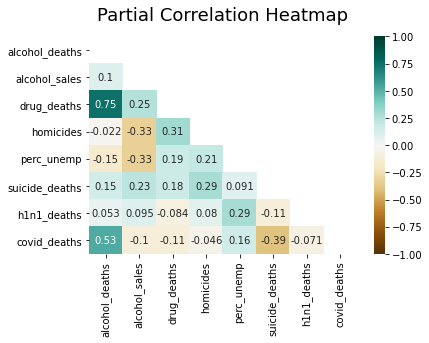

In [10]:
def pcorr_heatmap(dataframe):
    mask = np.triu(np.ones_like(dataframe.pcorr(), dtype=np.bool))
    heatmap = sns.heatmap(dataframe.pcorr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Partial Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
pcorr_heatmap(df)

This table once again shows that the strongest indicator of a mental health decline is alcohol_sales; however, the relationships between suicide and the pandemics have changed. In this table the strongest negative correlation is linked to covid_deaths. While h1n1_deaths is still negatively correlated to suicide deaths, it is only 1/3 of the strength of the relationship between covid and suicide. This could mean that the actual relationship between covid and suicide does not exist. 

In [11]:
df.pcorr().unstack().sort_values().drop_duplicates().tail()

alcohol_deaths  covid_deaths      0.525439
covid_deaths    alcohol_deaths    0.525439
alcohol_deaths  drug_deaths       0.750968
drug_deaths     alcohol_deaths    0.750968
alcohol_deaths  alcohol_deaths    1.000000
dtype: float64

In [12]:
df.pcorr().unstack().sort_values().drop_duplicates().head()

suicide_deaths  covid_deaths     -0.391165
covid_deaths    suicide_deaths   -0.391165
perc_unemp      alcohol_sales    -0.327772
homicides       alcohol_sales    -0.327360
alcohol_sales   homicides        -0.327360
dtype: float64

# 2. LINEAR_REGRESSION
<hr>
Linear Regression is a statistical approach that models the relationship of indepencdent variables and a single dependent variable. We will be using the 3 dummy variables we created as our dependent variables(as we are trying to prove how much a pandemic "depends" on our selected factors). The linear regression will help us deteremine how strongly each independent variable affects the different dependent variables. 

In [13]:
# here we set our variables. "X" = independent, "y" = dependent. 
X=df[['alcohol_deaths','alcohol_sales','drug_deaths','homicides','covid_deaths','h1n1_deaths','perc_unemp']]


y=df[['suicide_deaths']]

The commanand below splits our data into the test and training set. The training set is used to train the model, basically teaching the model the best weights to set each vaiable at. The test set is used for testing the trained model on. The testing of the model will be explained via demonstration below. 

As for my split, I put 20% of the data in the training set and 80% of data in the testing set. This is set with the "test_size" parameter in the "train_test_split" function. I found this split to be effective at building a good model; however, feel free to play around with differnt sizes to see how it affects your model. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

### Model

In [16]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    # This function trains the model and assigns the weight for each function. The higher the value of coefficient indicates that as the 
# indepenent variable increases the dependent variable also tends to increase.

The coefficient for alcohol_deaths is 0.2014426957866886
The coefficient for alcohol_sales is 0.06383911678283272
The coefficient for drug_deaths is 0.10994217199717744
The coefficient for homicides is 0.1402404000766146
The coefficient for covid_deaths is -0.00406350777845936
The coefficient for h1n1_deaths is -0.010422560069357907
The coefficient for perc_unemp is 0.003774750741826838


In [17]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))
# this function is used to find the y intercept of our data(the value of our y variable when x = 0)

The intercept for our model is 0.6512591332874984


In [18]:
print("y = ",intercept, "+")
for idx, col_name in enumerate(X_train.columns):
    print("{}({}) + ".format(col_name, round(regression_model.coef_[0][idx],2)))
#Our regression line for this model is: 

y =  0.6512591332874984 +
alcohol_deaths(0.2) + 
alcohol_sales(0.06) + 
drug_deaths(0.11) + 
homicides(0.14) + 
covid_deaths(-0.0) + 
h1n1_deaths(-0.01) + 
perc_unemp(0.0) + 


 In THIS model(COVID) the highest coeffecient is for alcohol_deaths. This means that it is likely more alcohol deaths will occur if COVID deaths rise. The other variables in this model have negative correlations. This means the as COVID deaths rise their repspective values will fall. 

### R squared

In [19]:
regression_model.score(X_test, y_test)

0.659510747172463

In [20]:
#lm = sm.ols(formula='covid_dum ~ alcohol_deaths + alcohol_sales + drug_deaths + homicides + suicide_deaths + perc_unemp + gdp_period + yearly_infl', data=df)
lm = sm.ols(formula='suicide_deaths ~ alcohol_deaths + alcohol_sales + drug_deaths + homicides + covid_deaths + h1n1_deaths + perc_unemp', data=df)
fit = lm.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         suicide_deaths   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     100.1
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           4.61e-68
Time:                        16:58:02   Log-Likelihood:                 326.63
No. Observations:                 252   AIC:                            -637.3
Df Residuals:                     244   BIC:                            -609.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6658      0.035     18.835      0.000       0.596       0.735
alcohol_deaths     0.2128      0.088      2.416      0.016       0.039       0.386
alcohol_sales      0.0566      0.016      3.648      0.000       0.026       0.087
drug_deaths        0.0960      0.034      2.835      0.005       0.029       0.163
homicides          0.1463      0.031      4.692      0.000       0.085       0.208
covid_deaths      -0.0033      0.001     -6.639      0.000      -0.004      -0.002
h1n1_deaths       -0.0129      0.007     -1.726      0.086      -0.028       0.002
perc_unemp         0.0028      0.002      1.432      0.153      -0.001       0.007
==============================================================================
Omnibus:                        3.048   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.870
Skew:                          -0.261   Prob(JB):                        0.238
Kurtosis:                       3.041   Cond. No.                         271.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This statistics table has many numbers and it cna be quite confusing at first. I will walk you through interpretting the more important values. 

Our **adjusted R-squared** for this model is 0.736. This value represents the percent of variation in the dependent variable that can be predicted by the indendent variable(s). In other words this is how well the different factors can be used to forecast when there will be suicide deaths. The optimal range for adjusted r is above 0.75. Our value is extremeley close to fitting that range meaning our model is relatively accurate prediction. 

The **Prob(F-statistic)** represents the likliehood of these results occuring randomly. Since our value is very low, this means that our regression is statistically significant. The lower you the value means more confidence to reject the null hypothesis with. 

The **P>|t|**(p-value) column shows us the significance for the individual factors. A value below 0.005 indicates statistical significance. In our model the alcohol_deaths variable has a p value of 0.016, meaning that its role in the regression is not significant. This is somewhat intersteing becasue this on first glance this would be the most significant variable because of its large coefficent. This reinforces the fact that you NEED to use multiply values/measures to make any type of accurate conclusion. 


The link below provides explanaations about other values in the table that I chose not to cover. 
https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01#:~:text=Prob(F%2DStatistic)%3A%20This,coefficients%20are%20equal%20to%20zero%E2%80%9D.


In [21]:
X_test.head()

,alcohol_deaths,alcohol_sales,drug_deaths,homicides,covid_deaths,h1n1_deaths,perc_unemp
67,0.584914,0.464975,0.908476,0.000000,0.000000,0.0,4.9
251,1.399548,1.207504,2.387641,0.667069,104.310475,0.0,6.7
231,0.951684,1.077418,1.788982,0.440459,0.000000,0.0,3.6
161,0.726703,0.347508,1.233020,0.471169,0.000000,0.0,7.5
91,0.633499,0.346180,1.093864,0.566833,0.000000,0.0,4.6


In [22]:
from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)

In [23]:
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

0.005785532712317225

### RMSE

In [24]:
import math
math.sqrt(regression_model_mse)

0.07606268935764252

Our model has an RMSE above 0.2 meaning that the average variation of the data from the linear model is somewhat large. This indicates that the model is less effective at prediction.

# 3. Discussion

Research question:
- What factors are correlated most with mental health decline during a pandemic?
- Which pandemic had a more profound effect on mental health?

Null Hypothesis: 
- No factors exhibited any behaivior that was statiscally significent in the specificied period meaning that ther is no differnce between the pandemics.

Aleternative Hypothesis:
- The percentage unemployed had the most significant effect on suicide rates/mental health and the COVID pandemic showed a decline in mental health. 


After our analysis, which includes the visualitions as well as the linear models above, we have created a story that shows the how each factor contributes to the mental health patterns in the US. In our scaled visualizations we saw the differences between many factors, the highlight being the vast diffference between the number of h1n1 and COVID deaths. 

We investigated the differnces further by conduction a linear regression that we built to predict the occurence of deaths due to each virus based on the a group of independent  variables: alcohol_deaths, alcohol sales, drug_deaths, homicides, suicide_deaths, percent unemployed. The adjusted r score of our COVID model was 0.565, 3 times higher than the R score for the H1N1 model. This indicates that the COVID model was a much better fit for the data; the changes in the data could be explained 3 times better with the COVID model than the h1n1 model. Our RMSE scores for both models were slightly more similiar. COVID scored 0.18 and H1N1 scored 0.21. This score also supports that the covid model was more prescise as the average varaince of the model from the data was lower. I ran a third model that group the dummy variables from bith H1N1 and COVID. The R score was right in the middle of the other two but the RMSE was the highest out of all three. I believe that this is because the model was being built to predict at two different points, making the likelihood for error higher.